# Analisis Sentimen Opini Masyarakat terhadap ChatGPT sebagai Aplikasi Natural Language Processing

In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

chatgpt_tweets_df = pd.read_csv('/content/drive/MyDrive/Project Skripsi/dataset/chatgpt_tweets_dataset.csv')
chatgpt_tweets_df.sample(10, random_state=8)

,date,user_name,text,sentiment
12283,2023-03-24 08:13:49+00:00,KaEl,"#ChatGPT third-Party plugins, the „eyes and ea...",Neutral
1986,2023-02-07 16:25:07+00:00,Piyush Tiwari,OpenAI: #ChatGPT is the future!\n\nGoogle: hol...,Neutral
3974,2022-12-10 12:37:15+00:00,Poonam Soni,"@wahVinci Also there is #ChatGPT now, 👀\nGivin...",Positive
9641,2023-03-10 16:30:55+00:00,Stefanescu Liviu,Social media comments made with #Chatgpt #AI. ...,Negative
4517,2023-02-12 15:05:43+00:00,BeryBearishBear,some of leading marijuana companies.... accord...,Neutral
13155,2023-04-25 13:53:17+00:00,Temerty Centre for AI in Medicine (T-CAIREM),How #ArtificialIntelligence Like #ChatGPT Is I...,Positive
14568,2022-12-08 20:55:36+00:00,jhermes,Space &amp; Time.\nTuring Test: failed. #ChatG...,Negative
9872,2023-02-27 16:20:47+00:00,Dr. Hilary Murray,Excellent panel on #ChatGPT held by our #Trust...,Positive
1157,2023-04-06 08:43:02+00:00,AbandonHope,surely there should be settings&gt; share data...,Positive
10830,2023-04-24 21:51:39+00:00,azlef900 ✨👽🌙,"New youtube series in the works ""Deconstructin...",Positive


## Data Preparation and Preprocessing

### Text Filtering and Case Folding

Text filtering adalah proses penghapusan atau modifikasi elemen tertentu dalam data teks dengan tujuan untuk meningkatkan kualitas atau mempersiapkannya untuk analisis lebih lanjut.
Case folding atau normalisasi teks adalah proses yang mengubah teks menjadi format huruf yang konsisten. Dalam case folding, terdapat dua pendekatan yang sering digunakan yaitu lowercasing dan uppercasing. Penggunaan case folding dalam penelitian ini adalah menggunakan lowercasing.

In [ ]:
import re
import html

def remove_html_escape(text):
    return html.unescape(text)

def remove_escape_sequence(text):
    escape_sequence_pattern = re.compile(r'[\n\t\r\\]')
    return escape_sequence_pattern.sub(' ', text)

def remove_emojis(text):
    emoji_pattern = re.compile('['
                              u'\U0001F600-\U0001F64F'  # emoticons
                              u'\U0001F300-\U0001F5FF'  # symbols & pictographs
                              u'\U0001F680-\U0001F6FF'  # transport & map symbols
                              u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
                              ']+', flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_username(text):
    username_pattern = re.compile(r'@\w+')
    return username_pattern.sub('', text)

def remove_hashtag(text):
    hashtag_pattern = re.compile(r'#[\w\d]+')
    return hashtag_pattern.sub('', text)

def remove_possession(text):
    possession_pattern = re.compile(r'\'s')
    return possession_pattern.sub(' is', text)

def remove_contraction(text):
    contraction_patterns = [
        (r"\bcan't\b", "cannot"),
        (r"\bwon't\b", "will not"),
        (r"\bain't\b", "am not"),
        (r"\bisn't\b", "is not"),
        (r"\baren't\b", "are not"),
        (r"\bwasn't\b", "was not"),
        (r"\bweren't\b", "were not"),
        (r"\bhasn't\b", "has not"),
        (r"\bhaven't\b", "have not"),
        (r"\bhadn't\b", "had not"),
        (r"\bdoesn't\b", "does not"),
        (r"\bdon't\b", "do not"),
        (r"\bdidn't\b", "did not"),
        (r"\bcouldn't\b", "could not"),
        (r"\bshouldn't\b", "should not"),
        (r"\bwouldn't\b", "would not"),
        (r"\bmightn't\b", "might not"),
        (r"\bmustn't\b", "must not"),
        (r"\bshan't\b", "shall not"),
        (r"\bi'm\b", "I am"),
        (r"\byou're\b", "you are"),
        (r"\bhe's\b", "he is"),
        (r"\bshe's\b", "she is"),
    ]

    for pattern, replacement in contraction_patterns:
        text = re.sub(pattern, replacement, text)

    return text


def remove_links(text):
    link_pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+|www(?:\.[a-zA-Z0-9-]+){2,3}(?:/[a-zA-Z0-9]+)?')
    return link_pattern.sub('', text)

def remove_slashed_dashed(text):
    slashed_dashed_pattern = re.compile(r'[/-]')
    return slashed_dashed_pattern.sub(' ', text)

def remove_dollar_words(text):
    pattern = re.compile(r'{}\w*\b'.format(re.escape('$')))
    return pattern.sub('', text)

def remove_punctuation(text):
    punctuation_pattern = re.compile(r'[^\w\s]+')
    return punctuation_pattern.sub('', text)

def remove_digits(text):
    digits_pattern = re.compile(r'\b\w*\d+\w*\b')
    return digits_pattern.sub('', text)

def remove_one_character(text):
    one_character_pattern = re.compile(r'\b(?!i\b)\w\b')
    return one_character_pattern.sub(' ', text)

def remove_indian_text(text):
    indian_script_pattern = re.compile(r'[\u0900-\u097F\u0980-\u09FF\u0A00-\u0A7F\u0A80-\u0AFF\u0B00-\u0B7F\u0B80-\u0BFF\u0C00-\u0C7F\u0C80-\u0CFF\u0D00-\u0D7F\u0D80-\u0DFF\u0E00-\u0E7F\u0E80-\u0EFF\u0F00-\u0FFF]+')
    return indian_script_pattern.sub('', text)

def remove_special_characters(text):
    special_char_pattern = re.compile(r'[^a-zA-Z0-9\s]')
    return special_char_pattern.sub('', text)

def remove_special_unicode(text):
    unicode_pattern = re.compile(r'[\u2000-\u206F\u2E00-\u2E7F\\!"#$%&\'()*+,\-./:;<=>?@\[\]^_`{|}~]')
    return unicode_pattern.sub('', text)
    
def clean_text(text):
    text = text.lower()
    text = remove_html_escape(text)
    text = remove_escape_sequence(text)
    text = remove_emojis(text)
    text = remove_username(text)
    text = remove_hashtag(text)
    text = remove_possession(text)
    text = remove_contraction(text)
    text = remove_links(text)
    text = remove_slashed_dashed(text)
    text = remove_dollar_words(text)
    text = remove_punctuation(text)
    text = remove_digits(text)
    text = remove_one_character(text)
    text = remove_indian_text(text)
    text = remove_special_characters(text)
    text = remove_special_unicode(text)
    text = re.sub(r'\s{2,}', ' ', text)
    text = text.strip()
    
    return text

chatgpt_tweets_df['filtered_text'] = chatgpt_tweets_df['text'].apply(clean_text)

In [ ]:
chatgpt_tweets_df[['text', 'filtered_text']].sample(10, random_state=8)

,text,filtered_text
12283,"#ChatGPT third-Party plugins, the „eyes and ea...",third party plugins the eyes and ears for larg...
1986,OpenAI: #ChatGPT is the future!\n\nGoogle: hol...,openai is the future google hold my
3974,"@wahVinci Also there is #ChatGPT now, 👀\nGivin...",also there is now giving code directly
9641,Social media comments made with #Chatgpt #AI. ...,social media comments made with the future wil...
4517,some of leading marijuana companies.... accord...,some of leading marijuana companies according ...
13155,How #ArtificialIntelligence Like #ChatGPT Is I...,how like is influencing medical diagnoses
14568,Space &amp; Time.\nTuring Test: failed. #ChatG...,space time turing test failed
9872,Excellent panel on #ChatGPT held by our #Trust...,excellent panel on held by our team looking at...
1157,surely there should be settings&gt; share data...,surely there should be settings share data and...
10830,"New youtube series in the works ""Deconstructin...",new youtube series in the works deconstructing...


### Tokenization

Proses tokenisasi dilakukan dengan menggunakan pustaka NLTK guna membagi setiap tweet menjadi unit-unit yang lebih kecil. Implementasi NLTK memungkinkan pelaksanaan tokenisasi pada setiap tweet secara efisien dan mudah, memungkinkan pemrosesan teks yang lebih lanjut untuk mendapatkan pemahaman yang lebih mendalam mengenai data tweet tersebut.

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize

chatgpt_tweets_df['tokenized'] = chatgpt_tweets_df['filtered_text'].apply(
    lambda x: word_tokenize(x))

In [ ]:
chatgpt_tweets_df[['text', 'filtered_text', 'tokenized']].sample(10, random_state=8)

,text,filtered_text,tokenized
12283,"#ChatGPT third-Party plugins, the „eyes and ea...",third party plugins the eyes and ears for larg...,"[third, party, plugins, the, eyes, and, ears, ..."
1986,OpenAI: #ChatGPT is the future!\n\nGoogle: hol...,openai is the future google hold my,"[openai, is, the, future, google, hold, my]"
3974,"@wahVinci Also there is #ChatGPT now, 👀\nGivin...",also there is now giving code directly,"[also, there, is, now, giving, code, directly]"
9641,Social media comments made with #Chatgpt #AI. ...,social media comments made with the future wil...,"[social, media, comments, made, with, the, fut..."
4517,some of leading marijuana companies.... accord...,some of leading marijuana companies according ...,"[some, of, leading, marijuana, companies, acco..."
13155,How #ArtificialIntelligence Like #ChatGPT Is I...,how like is influencing medical diagnoses,"[how, like, is, influencing, medical, diagnoses]"
14568,Space &amp; Time.\nTuring Test: failed. #ChatG...,space time turing test failed,"[space, time, turing, test, failed]"
9872,Excellent panel on #ChatGPT held by our #Trust...,excellent panel on held by our team looking at...,"[excellent, panel, on, held, by, our, team, lo..."
1157,surely there should be settings&gt; share data...,surely there should be settings share data and...,"[surely, there, should, be, settings, share, d..."
10830,"New youtube series in the works ""Deconstructin...",new youtube series in the works deconstructing...,"[new, youtube, series, in, the, works, deconst..."


### Remove Stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

chatgpt_tweets_df['removed_stopwords'] = chatgpt_tweets_df['tokenized'].apply(
    lambda x: [word for word in x if word not in stopwords.words('english')])

In [ ]:
chatgpt_tweets_df[['text', 'filtered_text', 'tokenized', 'removed_stopwords']].sample(10, random_state=8)

,text,filtered_text,tokenized,removed_stopwords
12283,"#ChatGPT third-Party plugins, the „eyes and ea...",third party plugins the eyes and ears for larg...,"[third, party, plugins, the, eyes, and, ears, ...","[third, party, plugins, eyes, ears, large, lan..."
1986,OpenAI: #ChatGPT is the future!\n\nGoogle: hol...,openai is the future google hold my,"[openai, is, the, future, google, hold, my]","[openai, future, google, hold]"
3974,"@wahVinci Also there is #ChatGPT now, 👀\nGivin...",also there is now giving code directly,"[also, there, is, now, giving, code, directly]","[also, giving, code, directly]"
9641,Social media comments made with #Chatgpt #AI. ...,social media comments made with the future wil...,"[social, media, comments, made, with, the, fut...","[social, media, comments, made, future, spam]"
4517,some of leading marijuana companies.... accord...,some of leading marijuana companies according ...,"[some, of, leading, marijuana, companies, acco...","[leading, marijuana, companies, according, bul..."
13155,How #ArtificialIntelligence Like #ChatGPT Is I...,how like is influencing medical diagnoses,"[how, like, is, influencing, medical, diagnoses]","[like, influencing, medical, diagnoses]"
14568,Space &amp; Time.\nTuring Test: failed. #ChatG...,space time turing test failed,"[space, time, turing, test, failed]","[space, time, turing, test, failed]"
9872,Excellent panel on #ChatGPT held by our #Trust...,excellent panel on held by our team looking at...,"[excellent, panel, on, held, by, our, team, lo...","[excellent, panel, held, team, looking, data, ..."
1157,surely there should be settings&gt; share data...,surely there should be settings share data and...,"[surely, there, should, be, settings, share, d...","[surely, settings, share, data, make, private,..."
10830,"New youtube series in the works ""Deconstructin...",new youtube series in the works deconstructing...,"[new, youtube, series, in, the, works, deconst...","[new, youtube, series, works, deconstructing, ..."


### Stemming

In [ ]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()
chatgpt_tweets_df['stemmed'] = chatgpt_tweets_df['removed_stopwords'].apply(
    lambda x: [ps.stem(word) for word in x])

In [ ]:
chatgpt_tweets_df[['text', 'filtered_text', 'tokenized', 'removed_stopwords', 'stemmed']].sample(10, random_state=8)

,text,filtered_text,tokenized,removed_stopwords,stemmed
12283,"#ChatGPT third-Party plugins, the „eyes and ea...",third party plugins the eyes and ears for larg...,"[third, party, plugins, the, eyes, and, ears, ...","[third, party, plugins, eyes, ears, large, lan...","[third, parti, plugin, eye, ear, larg, languag..."
1986,OpenAI: #ChatGPT is the future!\n\nGoogle: hol...,openai is the future google hold my,"[openai, is, the, future, google, hold, my]","[openai, future, google, hold]","[openai, futur, googl, hold]"
3974,"@wahVinci Also there is #ChatGPT now, 👀\nGivin...",also there is now giving code directly,"[also, there, is, now, giving, code, directly]","[also, giving, code, directly]","[also, give, code, directli]"
9641,Social media comments made with #Chatgpt #AI. ...,social media comments made with the future wil...,"[social, media, comments, made, with, the, fut...","[social, media, comments, made, future, spam]","[social, media, comment, made, futur, spam]"
4517,some of leading marijuana companies.... accord...,some of leading marijuana companies according ...,"[some, of, leading, marijuana, companies, acco...","[leading, marijuana, companies, according, bul...","[lead, marijuana, compani, accord, bullish]"
13155,How #ArtificialIntelligence Like #ChatGPT Is I...,how like is influencing medical diagnoses,"[how, like, is, influencing, medical, diagnoses]","[like, influencing, medical, diagnoses]","[like, influenc, medic, diagnos]"
14568,Space &amp; Time.\nTuring Test: failed. #ChatG...,space time turing test failed,"[space, time, turing, test, failed]","[space, time, turing, test, failed]","[space, time, ture, test, fail]"
9872,Excellent panel on #ChatGPT held by our #Trust...,excellent panel on held by our team looking at...,"[excellent, panel, on, held, by, our, team, lo...","[excellent, panel, held, team, looking, data, ...","[excel, panel, held, team, look, data, futur, ..."
1157,surely there should be settings&gt; share data...,surely there should be settings share data and...,"[surely, there, should, be, settings, share, d...","[surely, settings, share, data, make, private,...","[sure, set, share, data, make, privat, mode]"
10830,"New youtube series in the works ""Deconstructin...",new youtube series in the works deconstructing...,"[new, youtube, series, in, the, works, deconst...","[new, youtube, series, works, deconstructing, ...","[new, youtub, seri, work, deconstruct, scienti..."


### Vector Conversion

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=5000)
vectors = vectorizer.fit_transform(chatgpt_tweets_df['stemmed'].apply(
    lambda x: ' '.join(x)))
vectors = [vector.toarray()[0] for vector in vectors]
chatgpt_tweets_df['vectors'] = vectors

In [ ]:
chatgpt_tweets_df[['text', 'filtered_text', 'tokenized', 'removed_stopwords', 'stemmed', 'vectors']].sample(10, random_state=8)

,text,filtered_text,tokenized,removed_stopwords,stemmed,vectors
12283,"#ChatGPT third-Party plugins, the „eyes and ea...",third party plugins the eyes and ears for larg...,"[third, party, plugins, the, eyes, and, ears, ...","[third, party, plugins, eyes, ears, large, lan...","[third, parti, plugin, eye, ear, larg, languag...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1986,OpenAI: #ChatGPT is the future!\n\nGoogle: hol...,openai is the future google hold my,"[openai, is, the, future, google, hold, my]","[openai, future, google, hold]","[openai, futur, googl, hold]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3974,"@wahVinci Also there is #ChatGPT now, 👀\nGivin...",also there is now giving code directly,"[also, there, is, now, giving, code, directly]","[also, giving, code, directly]","[also, give, code, directli]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9641,Social media comments made with #Chatgpt #AI. ...,social media comments made with the future wil...,"[social, media, comments, made, with, the, fut...","[social, media, comments, made, future, spam]","[social, media, comment, made, futur, spam]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4517,some of leading marijuana companies.... accord...,some of leading marijuana companies according ...,"[some, of, leading, marijuana, companies, acco...","[leading, marijuana, companies, according, bul...","[lead, marijuana, compani, accord, bullish]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
13155,How #ArtificialIntelligence Like #ChatGPT Is I...,how like is influencing medical diagnoses,"[how, like, is, influencing, medical, diagnoses]","[like, influencing, medical, diagnoses]","[like, influenc, medic, diagnos]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
14568,Space &amp; Time.\nTuring Test: failed. #ChatG...,space time turing test failed,"[space, time, turing, test, failed]","[space, time, turing, test, failed]","[space, time, ture, test, fail]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9872,Excellent panel on #ChatGPT held by our #Trust...,excellent panel on held by our team looking at...,"[excellent, panel, on, held, by, our, team, lo...","[excellent, panel, held, team, looking, data, ...","[excel, panel, held, team, look, data, futur, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1157,surely there should be settings&gt; share data...,surely there should be settings share data and...,"[surely, there, should, be, settings, share, d...","[surely, settings, share, data, make, private,...","[sure, set, share, data, make, privat, mode]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
10830,"New youtube series in the works ""Deconstructin...",new youtube series in the works deconstructing...,"[new, youtube, series, in, the, works, deconst...","[new, youtube, series, works, deconstructing, ...","[new, youtub, seri, work, deconstruct, scienti...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
chatgpt_tweets_df.to_csv('/content/drive/MyDrive/Project Skripsi/dataset/chatgpt_tweets_dataset_processed.csv', index=False)

In [ ]:
import numpy as np

X = np.asarray(vectors)
y = np.asarray(chatgpt_tweets_df['sentiment'].apply(
    lambda x: 0 if x == 'Negative' else 1 if x == 'Neutral' else 2 if x == 'Positive' else x))

np.savez_compressed('X.npz', X)
np.savez_compressed('y.npz', y)

## Training

In [ ]:
import time
import numpy as np
from sklearn.model_selection import train_test_split

X = np.asarray(vectors)
y = np.asarray(chatgpt_tweets_df['sentiment'].apply(
    lambda x: 0 if x == 'Negative' else 1 if x == 'Neutral' else 2 if x == 'Positive' else x))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15, random_state=8)

print(f'Total data\t\t: {len(X)}')
print(f'Total training data\t: {len(X_train)}')
print(f'Total testing data\t: {len(X_test)}')

Total data		: 15000
Total training data	: 12750
Total testing data	: 2250


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(verbose=3, n_jobs=-1, random_state=8)
rf_start = time.time()
rf.fit(X_train, y_train)
rf_stop = time.time()

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   42.3s


building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.5min finished


### LightGBM

In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lightgbm import LGBMClassifier

# lgbm = LGBMClassifier(
#     n_estimators=150,
#     num_leaves=40,
#     subsample_for_bin=1000,
#     objective='multiclass',
#     class_weight='balanced',
#     verbose=0, n_jobs=-1, random_state=8)
lgbm = LGBMClassifier(verbose=0, n_jobs=-1, random_state=8)
lgbm_start = time.time()
lgbm.fit(X_train, y_train)
lgbm_stop = time.time()

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.088523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


## Evaluasi

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score

y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='macro')
rf_recall = recall_score(y_test, y_pred_rf, average='macro')

y_pred_lgbm = lgbm.predict(X_test)
lgbm_accuracy = accuracy_score(y_test, y_pred_lgbm)
lgbm_precision = precision_score(y_test, y_pred_lgbm, average='macro')
lgbm_recall = recall_score(y_test, y_pred_lgbm, average='macro')

model_table = pd.DataFrame({
    'model': ['Random Forest', 'LightGBM'],
    'accuracy': ['{:.2f}%'.format(rf_accuracy*100), '{:.2f}%'.format(lgbm_accuracy*100)],
    'precision': ['{:.2f}%'.format(rf_precision*100), '{:.2f}%'.format(lgbm_precision*100)],
    'recall': ['{:.2f}%'.format(rf_recall*100), '{:.2f}%'.format(lgbm_recall*100)],
    'execution_time': [(rf_stop - rf_start), (lgbm_stop - lgbm_start)]
})
model_table

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.2s finished


,model,accuracy,precision,recall,execution_time
0,Random Forest,78.62%,79.01%,78.82%,147.609414
1,LightGBM,77.11%,77.96%,77.34%,3.557240


## Hyperparameter Tuning

In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.1 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.model_selection import cross_val_score

def rf_objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
    }

    model = RandomForestClassifier(**params)

    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score

rf_study = optuna.create_study(direction='maximize')
rf_study.optimize(rf_objective, n_trials=20)

print(f'Random Forest Hyperparameter Tuning')
print(f'Best score\t\t: {rf_study.best_value}')
print(f'Best hyperparameters\t: {rf_study.best_params}')

[I 2023-05-28 23:21:44,540] A new study created in memory with name: no-name-c39df5fa-eb5e-41f8-bc73-fdc9d73f2dfc
[I 2023-05-28 23:23:05,924] Trial 0 finished with value: 0.647372549019608 and parameters: {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.647372549019608.
[I 2023-05-28 23:23:46,107] Trial 1 finished with value: 0.6630588235294118 and parameters: {'n_estimators': 100, 'max_depth': 11, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.6630588235294118.
[I 2023-05-28 23:29:12,666] Trial 2 finished with value: 0.6743529411764706 and parameters: {'n_estimators': 800, 'max_depth': 12, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 2 with value: 0.6743529411764706.
[I 2023-05-28 23:34:40,446] Trial 3 finished with value: 0.6763137254901961 and parameters: {'n_estimators': 700, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 3 with value: 

Random Forest Hyperparameter Tuning
Best score		: 0.6803921568627451
Best hyperparameters	: {'n_estimators': 900, 'max_depth': 15, 'min_samples_split': 8, 'min_samples_leaf': 5}


In [ ]:
import optuna
from sklearn.model_selection import cross_val_score

def lgbm_objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 75, 175),
        'num_leaves': trial.suggest_int('num_leaves', 28, 50),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
        'subsample': trial.suggest_float('subsample', 0.2, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.2, 1),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.1, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.1, 1),
        'subsample_for_bin': trial.suggest_int('subsample_for_bin', 1000, 10000),
        'objective': trial.suggest_categorical('objective', ['multiclass']),
        'class_weight': trial.suggest_categorical('class_weight', ['balanced'])
    }

    model = LGBMClassifier(**params)

    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score

lgbm_study = optuna.create_study(direction='maximize')
lgbm_study.optimize(lgbm_objective, n_trials=20)

print(f'LightGBM Hyperparameter Tuning')
print(f'Best score\t\t: {lgbm_study.best_value}')
print(f'Best hyperparameters\t: {lgbm_study.best_params}')

[I 2023-05-29 00:50:16,769] A new study created in memory with name: no-name-72bf5954-c98d-4d7f-953d-6e50859630cc
[I 2023-05-29 00:50:51,199] Trial 0 finished with value: 0.724156862745098 and parameters: {'n_estimators': 170, 'num_leaves': 48, 'learning_rate': 0.010143481124287361, 'subsample': 0.7617066525601544, 'colsample_bytree': 0.5962767507909721, 'reg_alpha': 0.3653184337520127, 'reg_lambda': 0.38282705071554657, 'subsample_for_bin': 2936, 'objective': 'multiclass', 'class_weight': 'balanced'}. Best is trial 0 with value: 0.724156862745098.
[I 2023-05-29 00:51:12,918] Trial 1 finished with value: 0.743686274509804 and parameters: {'n_estimators': 145, 'num_leaves': 29, 'learning_rate': 0.08005356295437852, 'subsample': 0.2815897021800119, 'colsample_bytree': 0.32991502802906847, 'reg_alpha': 0.2892676055197403, 'reg_lambda': 0.8523534020821861, 'subsample_for_bin': 2297, 'objective': 'multiclass', 'class_weight': 'balanced'}. Best is trial 1 with value: 0.743686274509804.
[I 20

LightGBM Hyperparameter Tuning
Best score		: 0.7494901960784313
Best hyperparameters	: {'n_estimators': 95, 'num_leaves': 35, 'learning_rate': 0.09938615140522253, 'subsample': 0.20158093062174387, 'colsample_bytree': 0.8461308316649893, 'reg_alpha': 0.5038634107622795, 'reg_lambda': 0.33280305180792646, 'subsample_for_bin': 9627, 'objective': 'multiclass', 'class_weight': 'balanced'}


In [ ]:
rf_hyp = RandomForestClassifier(**rf_study.best_params, verbose=3, n_jobs=-1, random_state=8)
rf_hyp_start = time.time()
rf_hyp.fit(X_train, y_train)
rf_hyp_stop = time.time()

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 900building tree 2 of 900

building tree 3 of 900
building tree 4 of 900
building tree 5 of 900
building tree 6 of 900
building tree 7 of 900
building tree 8 of 900
building tree 9 of 900
building tree 10 of 900
building tree 11 of 900
building tree 12 of 900
building tree 13 of 900
building tree 14 of 900
building tree 15 of 900
building tree 16 of 900
building tree 17 of 900
building tree 18 of 900
building tree 19 of 900
building tree 20 of 900
building tree 21 of 900
building tree 22 of 900
building tree 23 of 900
building tree 24 of 900
building tree 25 of 900
building tree 26 of 900
building tree 27 of 900
building tree 28 of 900
building tree 29 of 900


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    6.7s


building tree 30 of 900
building tree 31 of 900
building tree 32 of 900
building tree 33 of 900
building tree 34 of 900
building tree 35 of 900
building tree 36 of 900
building tree 37 of 900
building tree 38 of 900
building tree 39 of 900
building tree 40 of 900
building tree 41 of 900
building tree 42 of 900
building tree 43 of 900
building tree 44 of 900
building tree 45 of 900
building tree 46 of 900
building tree 47 of 900
building tree 48 of 900
building tree 49 of 900
building tree 50 of 900
building tree 51 of 900
building tree 52 of 900
building tree 53 of 900
building tree 54 of 900
building tree 55 of 900
building tree 56 of 900
building tree 57 of 900
building tree 58 of 900
building tree 59 of 900
building tree 60 of 900
building tree 61 of 900
building tree 62 of 900
building tree 63 of 900
building tree 64 of 900
building tree 65 of 900
building tree 66 of 900
building tree 67 of 900
building tree 68 of 900
building tree 69 of 900
building tree 70 of 900
building tree 71

[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   24.7s


building tree 126 of 900
building tree 127 of 900
building tree 128 of 900
building tree 129 of 900
building tree 130 of 900
building tree 131 of 900
building tree 132 of 900
building tree 133 of 900
building tree 134 of 900
building tree 135 of 900
building tree 136 of 900
building tree 137 of 900
building tree 138 of 900
building tree 139 of 900
building tree 140 of 900
building tree 141 of 900
building tree 142 of 900
building tree 143 of 900
building tree 144 of 900
building tree 145 of 900
building tree 146 of 900
building tree 147 of 900
building tree 148 of 900
building tree 149 of 900
building tree 150 of 900
building tree 151 of 900
building tree 152 of 900
building tree 153 of 900
building tree 154 of 900
building tree 155 of 900
building tree 156 of 900
building tree 157 of 900
building tree 158 of 900
building tree 159 of 900
building tree 160 of 900
building tree 161 of 900
building tree 162 of 900
building tree 163 of 900
building tree 164 of 900
building tree 165 of 900


[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:   49.9s


building tree 287 of 900
building tree 288 of 900
building tree 289 of 900
building tree 290 of 900
building tree 291 of 900
building tree 292 of 900
building tree 293 of 900
building tree 294 of 900
building tree 295 of 900
building tree 296 of 900
building tree 297 of 900
building tree 298 of 900
building tree 299 of 900
building tree 300 of 900
building tree 301 of 900
building tree 302 of 900
building tree 303 of 900
building tree 304 of 900
building tree 305 of 900
building tree 306 of 900
building tree 307 of 900
building tree 308 of 900
building tree 309 of 900
building tree 310 of 900
building tree 311 of 900
building tree 312 of 900
building tree 313 of 900
building tree 314 of 900
building tree 315 of 900
building tree 316 of 900
building tree 317 of 900building tree 318 of 900

building tree 319 of 900
building tree 320 of 900
building tree 321 of 900
building tree 322 of 900
building tree 323 of 900
building tree 324 of 900
building tree 325 of 900
building tree 326 of 900


[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  1.4min


building tree 510 of 900
building tree 511 of 900
building tree 512 of 900
building tree 513 of 900
building tree 514 of 900
building tree 515 of 900
building tree 516 of 900
building tree 517 of 900
building tree 518 of 900
building tree 519 of 900
building tree 520 of 900
building tree 521 of 900
building tree 522 of 900
building tree 523 of 900
building tree 524 of 900
building tree 525 of 900
building tree 526 of 900
building tree 527 of 900
building tree 528 of 900
building tree 529 of 900
building tree 530 of 900
building tree 531 of 900building tree 532 of 900

building tree 533 of 900
building tree 534 of 900
building tree 535 of 900
building tree 536 of 900
building tree 537 of 900
building tree 538 of 900
building tree 539 of 900
building tree 540 of 900
building tree 541 of 900
building tree 542 of 900
building tree 543 of 900
building tree 544 of 900
building tree 545 of 900
building tree 546 of 900
building tree 547 of 900
building tree 548 of 900
building tree 549 of 900


[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.2min


building tree 799 of 900
building tree 800 of 900
building tree 801 of 900
building tree 802 of 900
building tree 803 of 900
building tree 804 of 900
building tree 805 of 900
building tree 806 of 900
building tree 807 of 900
building tree 808 of 900
building tree 809 of 900
building tree 810 of 900
building tree 811 of 900
building tree 812 of 900
building tree 813 of 900
building tree 814 of 900building tree 815 of 900

building tree 816 of 900
building tree 817 of 900
building tree 818 of 900
building tree 819 of 900
building tree 820 of 900
building tree 821 of 900
building tree 822 of 900
building tree 823 of 900
building tree 824 of 900
building tree 825 of 900
building tree 826 of 900
building tree 827 of 900
building tree 828 of 900
building tree 829 of 900
building tree 830 of 900
building tree 831 of 900building tree 832 of 900

building tree 833 of 900building tree 834 of 900

building tree 835 of 900
building tree 836 of 900
building tree 837 of 900
building tree 838 of 900


[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  2.6min finished


In [ ]:
lgbm_hyp = LGBMClassifier(**rf_study.best_params, n_jobs=-1, random_state=8)
lgbm_hyp_start = time.time()
lgbm_hyp.fit(X_train, y_train)
lgbm_hyp_stop = time.time()

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: min_samples_split


In [ ]:
y_pred_rf_hyp = rf_hyp.predict(X_test)
rf_hyp_accuracy = accuracy_score(y_test, y_pred_rf_hyp)
rf_hyp_precision = precision_score(y_test, y_pred_rf_hyp, average='macro')
rf_hyp_recall = recall_score(y_test, y_pred_rf_hyp, average='macro')

y_pred_lgbm_hyp = lgbm_hyp.predict(X_test)
lgbm_hyp_accuracy = accuracy_score(y_test, y_pred_lgbm_hyp)
lgbm_hyp_precision = precision_score(y_test, y_pred_lgbm_hyp, average='macro')
lgbm_hyp_recall = recall_score(y_test, y_pred_lgbm_hyp, average='macro')

model_table = model_table.append(pd.DataFrame({
    'model': ['Random Forest with Hyperparameter', 'LightGBM with Hyperparameter'],
    'accuracy': ['{:.2f}%'.format(rf_hyp_accuracy*100), '{:.2f}%'.format(lgbm_hyp_accuracy*100)],
    'precision': ['{:.2f}%'.format(rf_hyp_precision*100), '{:.2f}%'.format(lgbm_hyp_precision*100)],
    'recall': ['{:.2f}%'.format(rf_hyp_recall*100), '{:.2f}%'.format(lgbm_hyp_recall*100)],
    'execution_time': [(rf_hyp_stop - rf_hyp_start), (lgbm_hyp_stop - lgbm_hyp_start)],
}), ignore_index=True)
model_table

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 508 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done 900 out of 900 | elapsed:    1.8s finished
<ipython-input-28-8ac453ee6469>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_table = model_table.append(pd.DataFrame({


,model,accuracy,precision,recall,execution_time
0,Random Forest,78.62%,79.01%,78.82%,147.609414
1,LightGBM,77.11%,77.96%,77.34%,3.557240
2,Random Forest with Hyperparameter,68.36%,72.86%,68.77%,159.410208
3,LightGBM with Hyperparameter,80.44%,80.54%,80.52%,75.679051


## Predict Test

In [ ]:
def label_decoder(label):
  if label == 0:
    return 'Negative'
  elif label == 1:
    return 'Neutral'
  elif label == 2:
    return 'Positive'

In [ ]:
test_text = "I have a friend who doesn't want to work complicated because the principle is 'I work smart, not work hard.' work smart but actually stupid, aka often doing assignments 100% copas owned by a friend/chatgpt 🤡"
test_text = clean_text(test_text)
test_text = word_tokenize(test_text)
test_text = [word for word in test_text if word not in stopwords.words('english')]
test_text = [ps.stem(word) for word in test_text]
test_text = vectorizer.transform([' '.join(test_text)])
test_text = np.asarray(test_text.toarray()[0])

label_decoder(lgbm_hyp.predict(test_text.reshape(1, -1))[0])

'Negative'

## Laporan

In [ ]:
pred_table = pd.DataFrame({
    'y_true': y_test,
    'random_forest': y_pred_rf,
    'lightgbm': y_pred_lgbm,
    'random_forest_hyperparameter': y_pred_rf_hyp,    
    'lightgbm_hyperparameter': y_pred_lgbm_hyp
})

pred_table['y_true'] = pred_table['y_true'].apply(lambda x: label_decoder(x))
pred_table['random_forest'] = pred_table['random_forest'].apply(lambda x: label_decoder(x))
pred_table['lightgbm'] = pred_table['lightgbm'].apply(lambda x: label_decoder(x))
pred_table['random_forest_hyperparameter'] = pred_table['random_forest_hyperparameter'].apply(lambda x: label_decoder(x))
pred_table['lightgbm_hyperparameter'] = pred_table['lightgbm_hyperparameter'].apply(lambda x: label_decoder(x))

pred_table.sample(10, random_state=8)

,y_true,random_forest,lightgbm,random_forest_hyperparameter,lightgbm_hyperparameter
916,Positive,Positive,Positive,Positive,Positive
114,Positive,Positive,Positive,Positive,Positive
1268,Positive,Positive,Positive,Positive,Positive
414,Negative,Positive,Neutral,Neutral,Positive
284,Positive,Neutral,Positive,Neutral,Positive
1422,Positive,Positive,Positive,Positive,Positive
1310,Positive,Positive,Positive,Positive,Neutral
73,Positive,Positive,Positive,Positive,Positive
1114,Neutral,Neutral,Neutral,Neutral,Neutral
15,Positive,Positive,Positive,Positive,Positive


In [ ]:
pred_table.to_csv('/content/pred_table.csv', index=False)

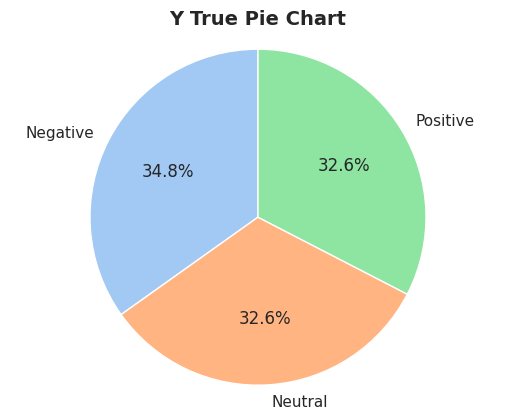

In [ ]:
import matplotlib.pyplot as plt

# Calculate value counts for each column
y_true_counts = pred_table['y_true'].value_counts()
random_forest_counts = pred_table['random_forest'].value_counts()
lightgbm_counts = pred_table['lightgbm'].value_counts()
random_forest_hyperparameter_counts = pred_table['random_forest_hyperparameter'].value_counts()
lightgbm_hyperparameter_counts = pred_table['lightgbm_hyperparameter'].value_counts()

# Create a figure and axes for the pie chart
fig, ax = plt.subplots()

# Plot the pie chart for y_true
ax.pie(y_true_counts, labels=y_true_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title with custom font
ax.set_title('Y True Pie Chart', fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'sans'})

# Add a legend with custom font
# ax.legend(y_true_counts.index, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), prop={'size': 12, 'family': 'sans'})

# Equal aspect ratio ensures circular pie chart
ax.axis('equal')

# Display the chart
plt.savefig('y_true_pie_chart.png', format='png', transparent=True)
plt.show()

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


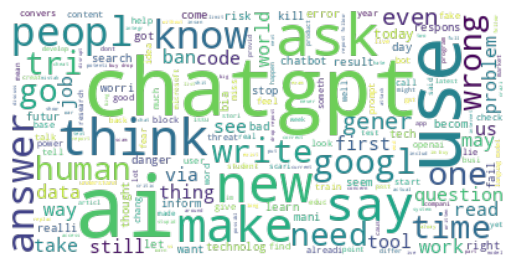

In [ ]:
from wordcloud import WordCloud

negative_text = chatgpt_tweets_df[chatgpt_tweets_df['sentiment'] == 'Negative']['stemmed'].apply(
    lambda x: ' '.join(x)
).tolist()

wordcloud = WordCloud(background_color='rgba(0, 0, 0, 0)', mode='RGBA').generate(' '.join(negative_text))

# Create a figure and axes for the word cloud
fig, ax = plt.subplots()

# Display the word cloud using matplotlib
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')

wordcloud_image_path = 'negative_wordcloud.png'
plt.savefig(wordcloud_image_path, format='png', transparent=True)

# Show the plot
plt.show()

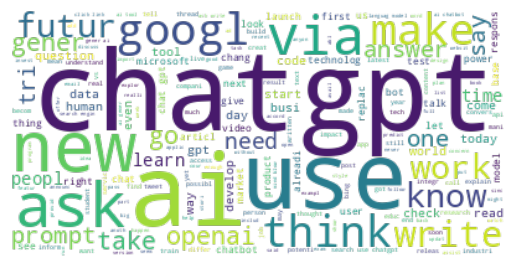

In [ ]:
from wordcloud import WordCloud

neutral_text = chatgpt_tweets_df[chatgpt_tweets_df['sentiment'] == 'Neutral']['stemmed'].apply(
    lambda x: ' '.join(x)
).tolist()

wordcloud = WordCloud(background_color='rgba(0, 0, 0, 0)', mode='RGBA').generate(' '.join(neutral_text))

# Create a figure and axes for the word cloud
fig, ax = plt.subplots()

# Display the word cloud using matplotlib
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')

wordcloud_image_path = 'neutral_wordcloud.png'
plt.savefig(wordcloud_image_path, format='png', transparent=True)

# Show the plot
plt.show()

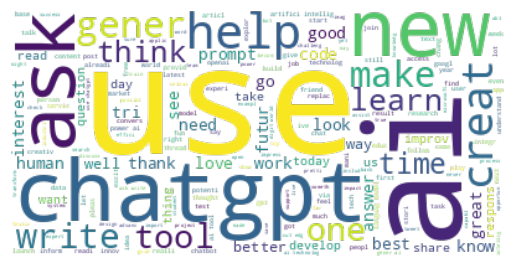

In [ ]:
from wordcloud import WordCloud

positive_text = chatgpt_tweets_df[chatgpt_tweets_df['sentiment'] == 'Positive']['stemmed'].apply(
    lambda x: ' '.join(x)
).tolist()

wordcloud = WordCloud(background_color='rgba(0, 0, 0, 0)', mode='RGBA').generate(' '.join(positive_text))

# Create a figure and axes for the word cloud
fig, ax = plt.subplots()

# Display the word cloud using matplotlib
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')

wordcloud_image_path = 'positive_wordcloud.png'
plt.savefig(wordcloud_image_path, format='png', transparent=True)

# Show the plot
plt.show()

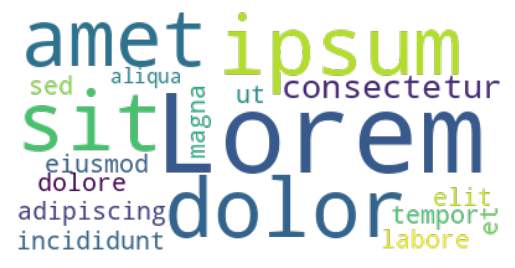

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample DataFrame with text column
df = pd.DataFrame({'text': ['Lorem ipsum dolor sit amet', 'consectetur adipiscing elit', 'sed do eiusmod tempor incididunt', 'ut labore et dolore magna aliqua']})

# Extract the text from the DataFrame and convert to a string
text = ' '.join(df['text'].tolist())

# Generate word cloud with transparent background
wordcloud = WordCloud(background_color='rgba(0, 0, 0, 0)', mode='RGBA').generate(text)

# Create a figure and axes for the word cloud with transparent background
fig, ax = plt.subplots(facecolor='w')

# Display the word cloud using matplotlib
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')

# Save the word cloud as a PNG image with transparent background
wordcloud_image_path = 'wordcloud.png'
plt.savefig(wordcloud_image_path, format='png', transparent=True)

# Show the plot (optional)
plt.show()